In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

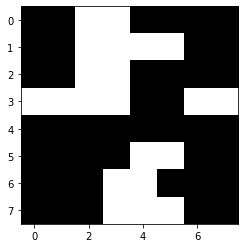

In [25]:
# 레이블링: connectedComponents(img, labels, connectivity, ltype)

img = np.array([[0, 0, 1, 1, 0, 0, 0, 0], 
                [0, 0, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 0, 0, 0, 0],
                [1, 1, 1, 1, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 1, 1, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 0, 0]], np.uint8)

plt.imshow(img, cmap='gray')

In [27]:
ret, labels = cv.connectedComponents(img)

ret, labels

(4,
 array([[0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 2, 2],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 3, 0, 0],
        [0, 0, 0, 3, 3, 0, 0, 0],
        [0, 0, 0, 3, 3, 3, 0, 0]], dtype=int32))

In [30]:
# 통계 수치와 함께 레이블링 구하기 = connectedComponentsWIthStats
ret, labels, stats, centroids = cv.connectedComponentsWithStats(img)
ret, labels, stats, centroids

(4,
 array([[0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 2, 2],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 3, 0, 0],
        [0, 0, 0, 3, 3, 0, 0, 0],
        [0, 0, 0, 3, 3, 3, 0, 0]], dtype=int32),
 array([[ 0,  0,  8,  8, 43],
        [ 0,  0,  6,  4, 12],
        [ 6,  3,  2,  1,  2],
        [ 3,  5,  3,  3,  7]], dtype=int32),
 array([[3.55813953, 3.60465116],
        [2.5       , 1.66666667],
        [6.5       , 3.        ],
        [4.        , 6.14285714]]))

In [31]:
stats
# 배경
# 1번 객체(x, y, width, height, size)
# 2번 객체
# 3번 객체

array([[ 0,  0,  8,  8, 43],
       [ 0,  0,  6,  4, 12],
       [ 6,  3,  2,  1,  2],
       [ 3,  5,  3,  3,  7]], dtype=int32)

In [33]:
centroids # 각 영역의 중심

array([[3.55813953, 3.60465116],
       [2.5       , 1.66666667],
       [6.5       , 3.        ],
       [4.        , 6.14285714]])

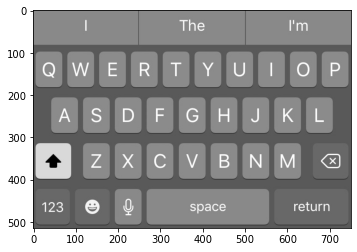

In [67]:
# 레이블링을 이용해 바운딩 박스 그리기
img = cv.imread('./keyboard.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [68]:
ret, labels, stats, centroids = cv.connectedComponentsWithStats(gray)
labels
# 이미지를 그냥 넣어서 자동으로 바운딩 박스가 잡히는게 아님!

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

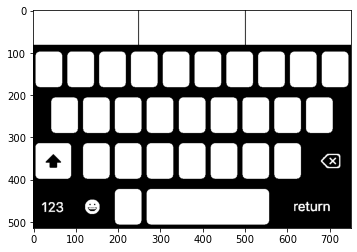

In [69]:
# thresholding 먼저
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

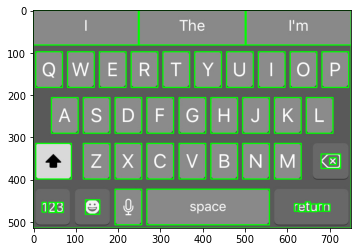

In [73]:
ret, labels, stats, centroids = cv.connectedComponentsWithStats(thresh)

for i in range(ret):
    
    x0 = stats[i][0]
    y0 = stats[i][1]
    
    x1 = x0 + stats[i][2]
    y1 = y0 + stats[i][3]
    
    cv.rectangle(img, (x0, y0), (x1, y1), (0, 255, 0), 2)

dst = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(dst)